In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# set params
params = {
    "loc": 150,
    "scale": 15,
    "size": 10000
}

# generate random values
height = np.random.normal(**params)
height_se = pd.Series(height)

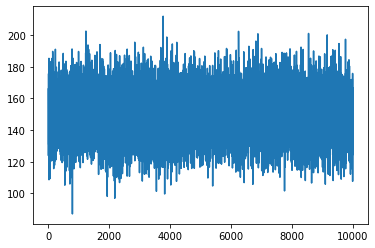

In [33]:
plt.plot(height)
plt.show()

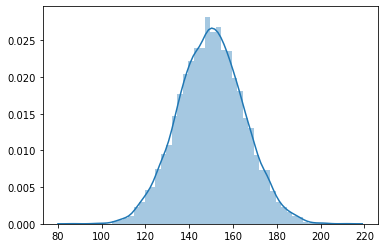

In [34]:
height_se.describe()
sns.distplot(height_se)

In [40]:
def calc_diff_from_population(size: int = 100, df: pd.DataFrame = None, is_print: bool = False):
    """
        calculate difference between mean of data frame and mean of sampling
    :param size: num of sample
    :param df: target data frame
    :param is_print: whether to print
    :return: difference between mean of data frame and mean of sampling
    """
    samples = df.sample(n=size)
    diff = abs(height_se.mean() - samples.mean())
    if is_print:
        print("difference between population and samples : {}".format(diff))
    return diff

## 母平均推定における推定の一致性の確認

確率分布が正規分布に従う母集団からサンプリングされた標本平均はnが大きくなるにつれて一致していく

nが大きくなるにつれて誤差が0に近づいていくことが確認できる。

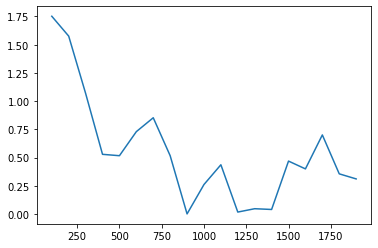

In [49]:
x = np.arange(0, 2000, 100)
y = [calc_diff_from_population(i, height_se) for i in x]
sns.lineplot(x=x, y=y)

## 中心極限定理の成り立ちを確認する。

中心極限定理は母集団の従う確率分布がどうあれ、サンプル数nの標本平均は、正規分に従うという法則。

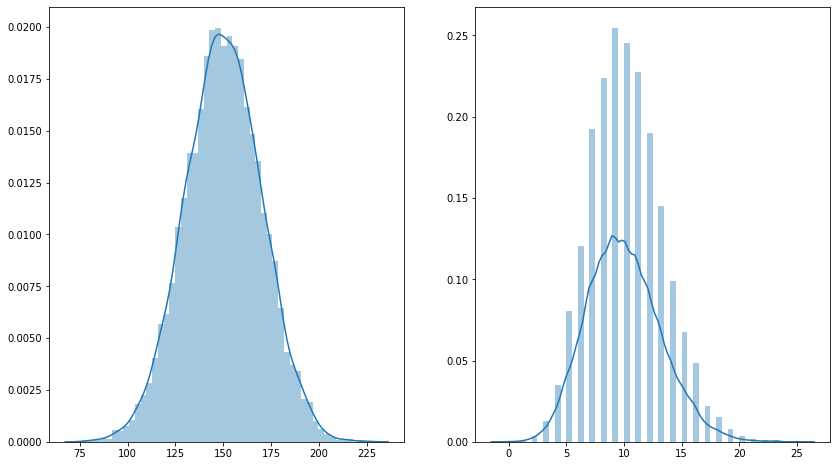

In [57]:
# generate values
values_by_normal = pd.Series(np.random.normal(150, 20, 10000))
values_by_poisson = pd.Series(np.random.poisson(10, 10000))

# visualize
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
sns.distplot(values_by_normal, ax=ax[0])
sns.distplot(values_by_poisson, ax=ax[1])

In [61]:
def central_limit_theorem(data, size=100, trials=None):
    if trials is None:
        return

    # set graphics
    axes = plt.axes()

    for t in trials:
        mean_list = [data.sample(size).mean() for _ in range(t)]
        sns.distplot(mean_list, label=f"trials:{t}" ,ax=axes)
    plt.legend()

    return

In [59]:
trials_normal = [10, 100, 1000, 10000]
trials_poisson = [10, 100, 1000, 10000]

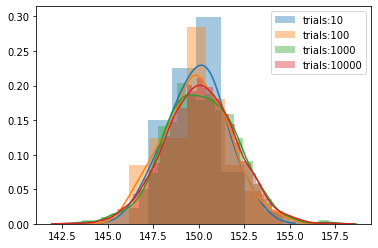

In [62]:
central_limit_theorem(values_by_normal, size=100, trials=trials_normal)

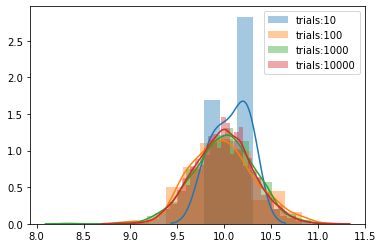

In [63]:

central_limit_theorem(values_by_poisson, size=100, trials=trials_poisson)